# Import

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import Map, CircleMarker, Vega, Popup,IFrame
import base64
from rpy2.robjects import r, numpy2ri
from rpy2.robjects import numpy2ri
numpy2ri.activate()
from rpy2.robjects.packages import importr
sinkr = importr('sinkr')

# Estimate Beta_1 and Beta_0

## Read data

In [41]:
data=pd.read_csv('v100_hr_20200101-0930_cut_utf8.csv')

In [77]:
###
#cal_PMf  
###
u=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T
###
#station
###
station=np.zeros([71,2])
for i in range (0,71):
    station[i][0]=np.array(data['lat'][96*i])
    station[i][1]=np.array(data['lon'][96*i])

## DINEOF

In [78]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 10.25375188"


[1]
 "1 EOF ; RMS = 10.25426829"


[1]
 "2 EOF ; RMS = 9.44158164"


[1]
 "2 EOF ; RMS = 9.44215172"


[1]
 "3 EOF ; RMS = 9.15515253"


[1]
 "3 EOF ; RMS = 9.15895586"


[1]
 "4 EOF ; RMS = 8.89943805"


[1]
 "4 EOF ; RMS = 8.90352053"


[1]
 "5 EOF ; RMS = 8.68801784"


[1]
 "5 EOF ; RMS = 8.68735783"


[1]
 "5 EOF ; RMS = 8.68807979"


[1]
 "6 EOF ; RMS = 8.56400474"


[1]
 "6 EOF ; RMS = 8.56896657"


[1]
 "7 EOF ; RMS = 8.52143717"


[1]
 "7 EOF ; RMS = 8.53574762"


[1]
 "8 EOF ; RMS = 8.4615365"


[1]
 "8 EOF ; RMS = 8.49275116"


[1]
 "9 EOF ; RMS = 8.41344513"


[1]
 "9 EOF ; RMS = 8.42573847"


[1]
 "10 EOF ; RMS = 8.36043135"


[1]
 "10 EOF ; RMS = 8.36589211"


[1]
 "11 EOF ; RMS = 8.31873815"


[1]
 "11 EOF ; RMS = 8.34390506"


[1]
 "12 EOF ; RMS = 8.28170345"


[1]
 "12 EOF ; RMS = 8.2914232"


[1]
 "13 EOF ; RMS = 8.23107545"


[1]
 "13 EOF ; RMS = 8.2399007"


[1]
 "14 EOF ; RMS = 8.21447886"


[1]
 "14 EOF ; RMS = 8.23309391"


[1]
 

## Restruct Function

In [79]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
###
#covariance function
###
XCov_fun=np.cov(XRestruct_Fun.T)
###
#mean function
###
XMean_fun=np.zeros(6816)
YMean_fun=np.zeros(6816)
for i in range(0,6816):
    for j in range(0,244):
        XMean_fun[i]=XMean_fun[i]+(XRestruct_Fun[j][i]/244)
        YMean_fun[i]=YMean_fun[i]+(YRestruct_Fun[j][i]/244)
###
#construct Function
###
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xbar=XMean_fun
Ybar=YMean_fun

## Regression

In [80]:
###
#G_xx
###
G_xx=XCov_fun
G_xxt=np.zeros(6816)
for i in range(0,6816):
     G_xxt[i]=G_xx[i][i]
###
#G_xy
###
G_xy=0
for i in range (0,244):
    G_xyi=(Xhat[i]-Xbar)*(Yhat[i]-Ybar)
    G_xy=G_xy+G_xyi
G_xy=G_xy/243

## Made beta

In [82]:
###
#Beta_1
###
B_1=G_xy/G_xxt
###
#Beta_0
###
B_0=YMean_fun-(B_1*XMean_fun)

# Calibrating Data

## Read data

In [83]:
###
#cal_PMf  
###
before_fx=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    before_fx[i]=a

## DINEOF

In [85]:
after_fx_r=sinkr.dineof(before_fx)
after_fx=np.array(after_fx_r[0])

[1]
 "1 EOF ; RMS = 10.12956684"


[1]
 "1 EOF ; RMS = 10.11764061"


[1]
 "1 EOF ; RMS = 10.11739192"


[1]
 "1 EOF ; RMS = 10.11739563"


[1]
 "2 EOF ; RMS = 9.33584317"


[1]
 "2 EOF ; RMS = 9.33768636"


[1]
 "3 EOF ; RMS = 9.04477077"


[1]
 "3 EOF ; RMS = 9.04692851"


[1]
 "4 EOF ; RMS = 8.79399686"


[1]
 "4 EOF ; RMS = 8.79296715"


[1]
 "4 EOF ; RMS = 8.7927758"


[1]
 "4 EOF ; RMS = 8.79268799"


[1]
 "4 EOF ; RMS = 8.79264376"


[1]
 "4 EOF ; RMS = 8.79262061"


[1]
 "4 EOF ; RMS = 8.79260838"


[1]
 "4 EOF ; RMS = 8.79260191"


[1]
 "5 EOF ; RMS = 8.63410591"


[1]
 "5 EOF ; RMS = 8.64242549"


[1]
 "6 EOF ; RMS = 8.52570936"


[1]
 "6 EOF ; RMS = 8.53561919"


[1]
 "7 EOF ; RMS = 8.46165368"


[1]
 "7 EOF ; RMS = 8.4712008"


[1]
 "8 EOF ; RMS = 8.41018408"


[1]
 "8 EOF ; RMS = 8.42661144"


[1]
 "9 EOF ; RMS = 8.36636456"


[1]
 "9 EOF ; RMS = 8.3841926"


[1]
 "10 EOF ; RMS = 8.37787736"


[1]
 "10 EOF ; RMS = 8.40116304"


[1]
 "11 EOF ; RMS = 8.36295783"


[1]
 "11 E

## Generate Calibrating Data

In [86]:
###
#Calibrating cal_PMf  
###
fit_fx=B_0+(B_1*after_fx)

# Compare

## Read data

In [87]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
###
#cal_PMf  
###
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i]=a
###
#obs_PMf
###
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i]=a
###
#Delete data correspond missing data
###
for i in range(0,274):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit_fx[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit_fx[i][j]=0

## Totol MADE (mean absolute deviation error)

(i) Compare January to August (training data set)

In [89]:
before_error1=0
after_error1=0
for i in range (0,244):
    for j in range(0,6816):
        before_error1=before_error1+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit_fx[i][j]-old_y[i][j])
before_error1=before_error1/244/6816
after_error1=after_error1/244/6816
print("January to August (training data set) before_error: %f" %before_error1)
print("January to August (training data set) after_error: %f" %after_error1)

January to August (training data set) before_error: 7.961740
January to August (training data set) after_error: 6.546843


(ii) Compare September (testing data set)

In [90]:
before_error2=0
after_error2=0
for i in range (244,274):
    for j in range(0,6816):
        before_error2=before_error2+abs(old_x[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit_fx[i][j]-old_y[i][j])
before_error2=before_error2/30/6816
after_error2=after_error2/30/6816
print("September (testing data set) before_error: %f" %before_error2)
print("September (testing data set) after_error: %f" %after_error2)

September (testing data set) before_error: 7.356276
September (testing data set) after_error: 5.728337


## MADE with days (以預測日來看)

(i) Compare January to August (training data set)

In [91]:
caldays_before_error1=np.zeros(244)
caldays_after_error1=np.zeros(244)
error1=0
error2=0
for i in range (0,244):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
    caldays_before_error1[i]=error1/6816
    caldays_after_error1[i]=error2/6816
    error1=0
    error2=0

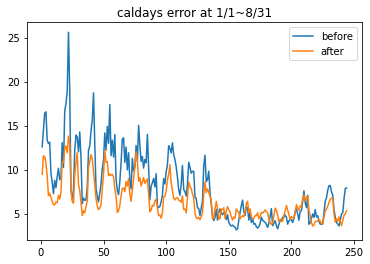

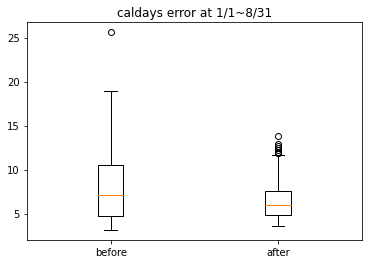

In [92]:
fig1 = plt.figure(1)
x=np.linspace(1,244,244)
plt.plot(x,caldays_before_error1, label = 'before')
plt.plot(x,caldays_after_error1, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([caldays_before_error1,caldays_after_error1], labels=('before','after'))
plt.title("caldays error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [93]:
caldays_before_error2=np.zeros(30)
caldays_after_error2=np.zeros(30)
error1=0
error2=0
for i in range (244,274):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
    caldays_before_error2[i-244]=error1/6816
    caldays_after_error2[i-244]=error2/6816
    error1=0
    error2=0

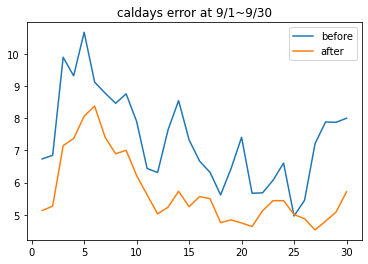

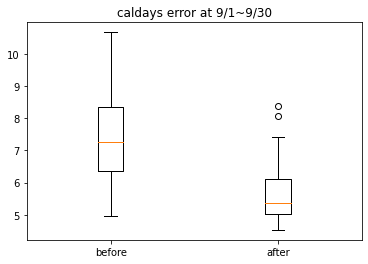

In [95]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,caldays_before_error2, label = 'before')
plt.plot(x,caldays_after_error2, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([caldays_before_error2,caldays_after_error2], labels=('before','after'))
plt.title("caldays error at 9/1~9/30")

plt.show()

## MADE with cal after how much days (以對第幾天後的預測來看)

(i) Compare January to August (training data set)

In [96]:
days_before_error1=np.zeros(4)
days_after_error1=np.zeros(4)
error1=0
error2=0
for k in range(0,4):
    for i in range (0,244):
        for j in range(0,71):
            for l in range(24*k,24*(k+1)):
                error1=error1+abs(old_x[i][(j*96)+l]-old_y[i][(j*96)+l])
                error2=error2+abs(fit_fx[i][(j*96)+l]-old_y[i][(j*96)+l])
    days_before_error1[k]=error1/244/71/24
    days_after_error1[k]=error2/244/71/24
    error1=0
    error2=0

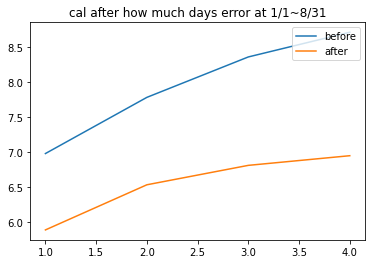

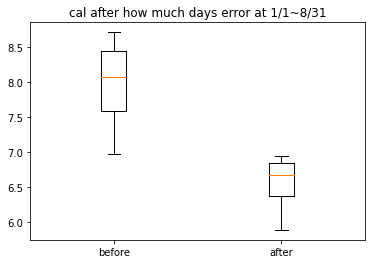

In [97]:
fig1 = plt.figure(1)
x=np.linspace(1,4,4)
plt.plot(x,days_before_error1, label = 'before')
plt.plot(x,days_after_error1, label ='after')
plt.legend(loc = 1)
plt.title('cal after how much days error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([days_before_error1,days_after_error1], labels=('before','after'))
plt.title("cal after how much days error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [98]:
days_before_error2=np.zeros(4)
days_after_error2=np.zeros(4)
error1=0
error2=0
for k in range(0,4):
    for i in range (244,274):
        for j in range(0,71):
            for l in range(24*k,24*(k+1)):
                error1=error1+abs(old_x[i][(j*96)+l]-old_y[i][(j*96)+l])
                error2=error2+abs(fit_fx[i][(j*96)+l]-old_y[i][(j*96)+l])
    days_before_error2[k]=error1/30/71/24
    days_after_error2[k]=error2/30/71/24
    error1=0
    error2=0

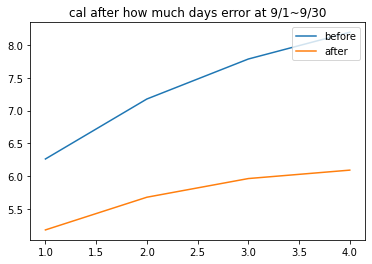

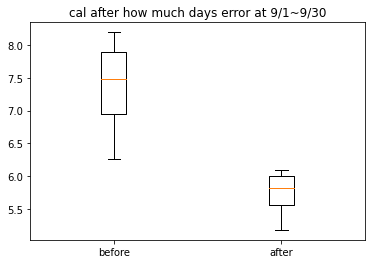

In [99]:
fig1 = plt.figure(1)
x=np.linspace(1,4,4)
plt.plot(x,days_before_error2, label = 'before')
plt.plot(x,days_after_error2, label ='after')
plt.legend(loc = 1)
plt.title('cal after how much days error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([days_before_error2,days_after_error2], labels=('before','after'))
plt.title("cal after how much days error at 9/1~9/30")

plt.show()

## MADE with cal after how much hours (以對第幾小時後的預測來看)

(i) Compare January to August (training data set)

In [100]:
hours_before_error1=np.zeros(96)
hours_after_error1=np.zeros(96)
error1=0
error2=0
for k in range(0,96):
    for i in range (0,244):
        for j in range(0,71):
            error1=error1+abs(old_x[i][(j*96)+k]-old_y[i][(j*96)+k])
            error2=error2+abs(fit_fx[i][(j*96)+k]-old_y[i][(j*96)+k])
    hours_before_error1[k]=error1/244/71
    hours_after_error1[k]=error2/244/71
    error1=0
    error2=0

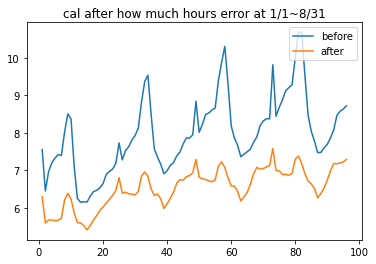

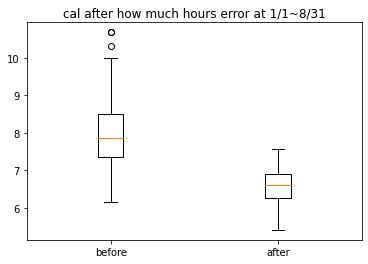

In [101]:
fig1 = plt.figure(1)
x=np.linspace(1,96,96)
plt.plot(x,hours_before_error1, label = 'before')
plt.plot(x,hours_after_error1, label ='after')
plt.legend(loc = 1)
plt.title('cal after how much hours error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([hours_before_error1,hours_after_error1], labels=('before','after'))
plt.title("cal after how much hours error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [102]:
hours_before_error2=np.zeros(96)
hours_after_error2=np.zeros(96)
error1=0
error2=0
for k in range(0,96):
    for i in range (244,274):
        for j in range(0,71):
            error1=error1+abs(old_x[i][(j*96)+k]-old_y[i][(j*96)+k])
            error2=error2+abs(fit_fx[i][(j*96)+k]-old_y[i][(j*96)+k])
    hours_before_error2[k]=error1/30/71
    hours_after_error2[k]=error2/30/71
    error1=0
    error2=0

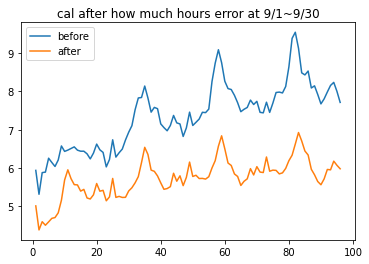

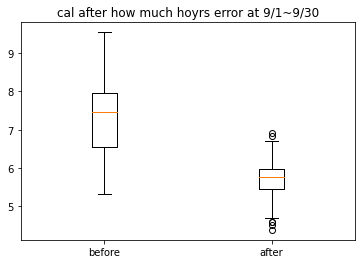

In [103]:
fig1 = plt.figure(1)
x=np.linspace(1,96,96)
plt.plot(x,hours_before_error2, label = 'before')
plt.plot(x,hours_after_error2, label ='after')
plt.legend(loc = 2)
plt.title('cal after how much hours error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([hours_before_error2,hours_after_error2], labels=('before','after'))
plt.title("cal after how much hoyrs error at 9/1~9/30")

plt.show()

## MADE with stations (以測站來看)

(i) Compare January to August (training data set)

In [104]:
station_before_error1=np.zeros(71)
station_after_error1=np.zeros(71)
error1=0
error2=0
for k in range(0,71):
    for i in range (0,244):
        for j in range(96*k,96*(k+1)):
            error1=error1+abs(old_x[i][j]-old_y[i][j])
            error2=error2+abs(fit_fx[i][j]-old_y[i][j])
    station_before_error1[k]=error1/244/96
    station_after_error1[k]=error2/244/96
    error1=0
    error2=0

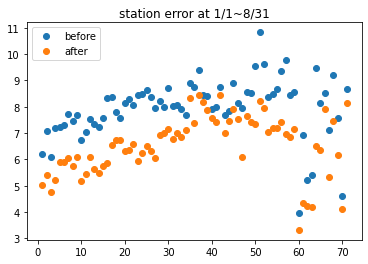

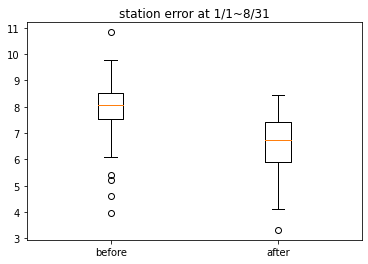

In [105]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,station_before_error1,'o', label = 'before')
plt.plot(x,station_after_error1,'o', label ='after')
plt.legend(loc = 2)
plt.title('station error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([station_before_error1,station_after_error1], labels=('before','after'))
plt.title("station error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [106]:
station_before_error2=np.zeros(71)
station_after_error2=np.zeros(71)
error1=0
error2=0
for k in range(0,71):
    for i in range (244,274):
        for j in range(96*k,96*(k+1)):
            error1=error1+abs(old_x[i][j]-old_y[i][j])
            error2=error2+abs(fit_fx[i][j]-old_y[i][j])
    station_before_error2[k]=error1/30/96
    station_after_error2[k]=error2/30/96
    error1=0
    error2=0

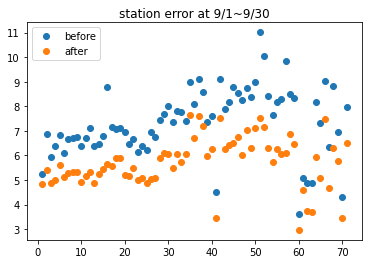

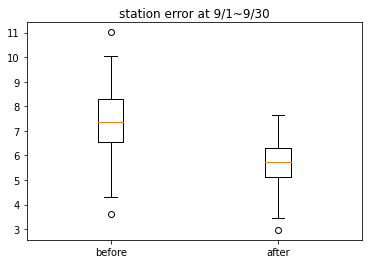

In [107]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,station_before_error2,'o', label = 'before')
plt.plot(x,station_after_error2,'o', label ='after')
plt.legend(loc = 2)
plt.title('station error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([station_before_error2,station_after_error2], labels=('before','after'))
plt.title("station error at 9/1~9/30")

plt.show()